<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_9/HOML_Chapter9_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [22]:
# !pip install yellowbrick

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

# Clustering

## Data

In [5]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

## Silhouette Score (KMeans)

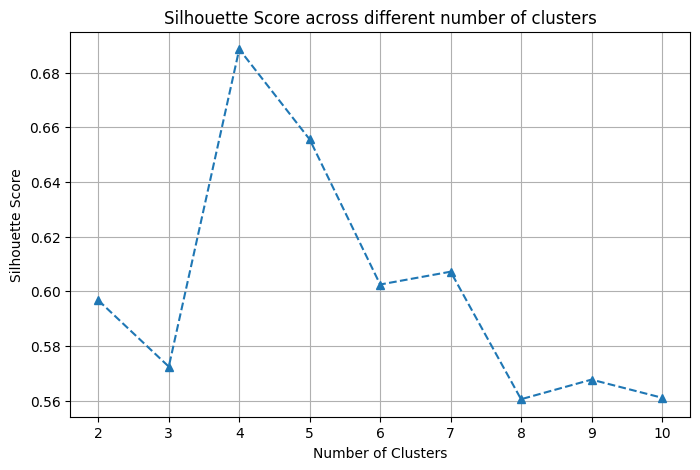

In [12]:
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, random_state=7)
  kmeans.fit(X)
  silhouette_scores.append(silhouette_score(X = X, labels = kmeans.labels_))
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(range(2, 11)), silhouette_scores, marker="^", linestyle="--")
ax.grid()
ax.set(
  xlabel="Number of Clusters", 
  ylabel="Silhouette Score", 
  title="Silhouette Score across different number of clusters"
)
plt.show()

Ref: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

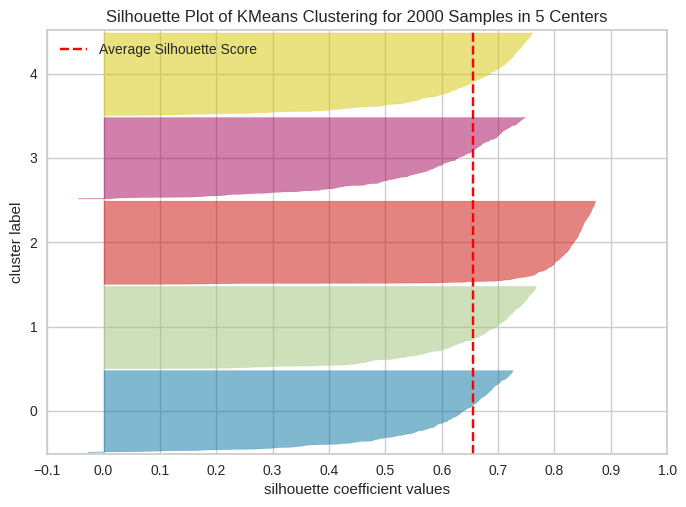

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
kmeans = KMeans(n_clusters = 5, random_state=7)
kmeans.fit(X)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure